In [1]:
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import bernoulli
from scipy.stats import pareto
from statistics import NormalDist
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy.io
import collections
import pickle
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes,InsetPosition,mark_inset)
import copy

## Visualizing the Saved Results

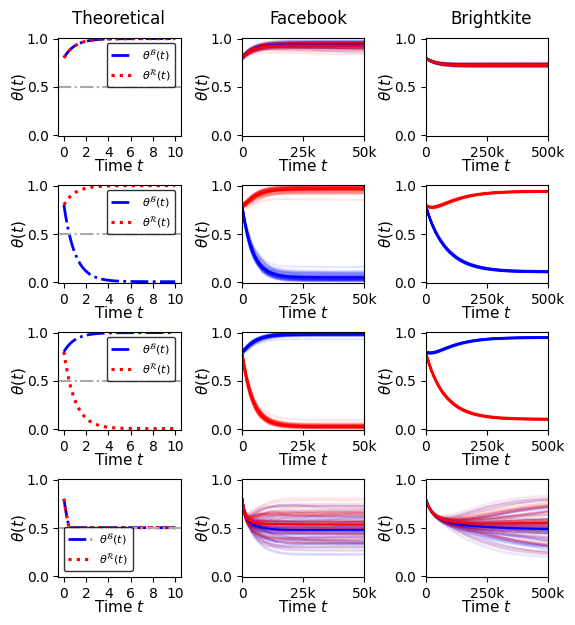

In [29]:
import matplotlib.pyplot as plt

# Create a figure and a 6x3 grid of subplots

Initial_H1_prob_blue_vec = [0.8,0.8,0.8,0.8]
Initial_H1_prob_red_vec = [0.8,0.8,0.8,0.8]

R_vec = [0.5,0.75,0.2,0.5]
Alpha_vec = [0.8,0.3,0.3,0.2]
Beta_vec = [0.2,0.6,0.6,0.8]

Rho_vec = [0.5,0.5,0.5,0.5]
Inertia_vec = [0.0,0.0,0.0,0.0]


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(6.32, 7))

for i in range(4):     
        # Set initial conditions
        Initial_H1_prob_blue = Initial_H1_prob_blue_vec[i]
        Initial_H1_prob_red = Initial_H1_prob_red_vec[i]

        # Set parameters
        R = R_vec[i]
        Alpha = Alpha_vec[i]
        Beta = Beta_vec[i]

        Rho = Rho_vec[i]
        Inertia = Inertia_vec[i]

        Alpha_b = Alpha
        Beta_b = Beta
        Rho_b = Rho
        Inertia_b = Inertia

        Alpha_r = Alpha
        Beta_r = Beta
        Rho_r = Rho
        Inertia_r = Inertia
    
        # Plot the theoretically predicted time series
        plt.sca(axes[i,0])
        SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)
        
        # Loading and plotting results for Brightkite Graph
        graph = 'facebook_combined.npy'
        
        name_blue = graph+'_blue_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'
        name_red = graph+'_red_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'

        blue_series = np.load(name_blue)
        red_series = np.load(name_red)

        blue_lower, blue_upper = compute_confidence_band(blue_series)
        red_lower, red_upper = compute_confidence_band(red_series)        
        
        plt.sca(axes[i,1])
        plt.plot(blue_series.T, color='blue', alpha=0.1)
        plt.plot(red_series.T, color='red', alpha=0.1)
        plt.plot(np.mean(blue_series, axis=0), color='blue', label='Blue Fraction of Attribute')
        plt.plot(np.mean(red_series, axis=0), color='red', label='Red Fraction of Attribute')
        plt.fill_between(np.arange(len(blue_lower)), blue_lower, blue_upper, color='blue', alpha=0.3)
        plt.fill_between(np.arange(len(red_lower)), red_lower, red_upper, color='red', alpha=0.3)        
        
        # Loading and plotting results for Brightkite Graph
        graph = 'Brightkite_edges.npy'
        
        name_blue = graph+'_blue_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'
        name_red = graph+'_red_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'

        blue_series = np.load(name_blue)
        red_series = np.load(name_red)

        blue_lower, blue_upper = compute_confidence_band(blue_series)
        red_lower, red_upper = compute_confidence_band(red_series)        
        
        plt.sca(axes[i,2])
        plt.plot(blue_series.T, color='blue', alpha=0.1)
        plt.plot(red_series.T, color='red', alpha=0.1)
        plt.plot(np.mean(blue_series, axis=0), color='blue', label='Blue Fraction of Attribute')
        plt.plot(np.mean(red_series, axis=0), color='red', label='Red Fraction of Attribute')
        plt.fill_between(np.arange(len(blue_lower)), blue_lower, blue_upper, color='blue', alpha=0.3)
        plt.fill_between(np.arange(len(red_lower)), red_lower, red_upper, color='red', alpha=0.3)        
        
 
for i in range(4):   
    FS = 11
    
    j = 0
    axes[i,j].set_xlabel(r'Time $t$', fontsize=FS, labelpad=-1)    
    axes[i,j].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
    axes[i,j].legend(fontsize = FS-3, edgecolor = 'inherit', ncol = 1) 
    axes[i,j].set_ylim(-0.01,1.01)
    axes[i,j].set_xticks(np.arange(0,11,2))  
    axes[i,j].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axes[i,j].set_xticks([0, 2, 4, 6, 8, 10])   
    axes[i,j].set_yticks([0.00, 0.50, 1.00])  
        
    j = 1
    axes[i,j].set_xlabel(r'Time $t$', fontsize=FS, labelpad=-1)    
    axes[i,j].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)    
    axes[i,j].set_xlim(0,50000)   
    axes[i,j].set_xticks(ticks = [0, 25000, 50000], labels = ['0', '25k', '50k'])      
    axes[i,j].set_ylim(-0.01,1.01) 
    axes[i,j].set_yticks([0.00, 0.50, 1.00])     

    j = 2
    axes[i,j].set_xlabel(r'Time $t$', fontsize=FS, labelpad=-1)    
    axes[i,j].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)    
    axes[i,j].set_xlim(0,500000)  
    axes[i,j].set_xticks(ticks = [0, 250000, 500000], labels = ['0', '250k', '500k'])       
    axes[i,j].set_ylim(-0.01,1.01)
    axes[i,j].set_yticks([0.00, 0.50, 1.00])      
        
plt.subplots_adjust(wspace=0.5) 
plt.subplots_adjust(hspace=0.5) 

# Adding column names
fig.text(0.22, 0.9, 'Theoretical', ha='center', fontsize=12)
fig.text(0.52, 0.9, 'Facebook', ha='center', fontsize=12)
fig.text(0.81, 0.9, 'Brightkite', ha='center', fontsize=12)

plt.savefig('RealGraphs_SameInitialStates' + '.pdf', bbox_inches='tight')

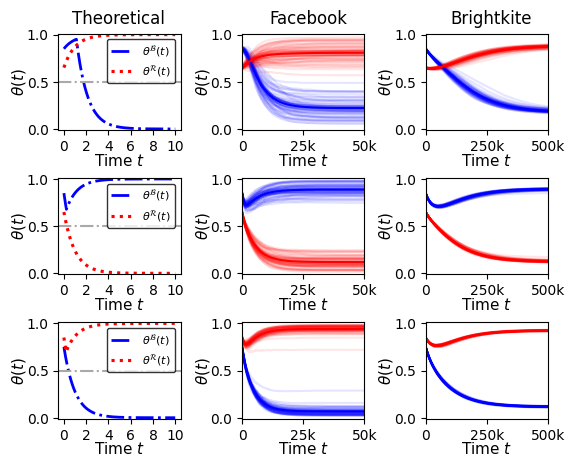

In [16]:
import matplotlib.pyplot as plt

# Create a figure and a 6x3 grid of subplots

Initial_H1_prob_blue_vec = [0.85,0.85,0.75]
Initial_H1_prob_red_vec = [0.65,0.65,0.85]

R_vec = [0.7,0.7,0.7]
Alpha_vec = [0.8,0.1,0.1]
Beta_vec = [0.4,0.4,0.4]

Rho_vec = [0.5,0.5,0.5]
Inertia_vec = [0.0,0.0,0.0]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6.32, 5))

for i in range(3):     
        # Set initial conditions
        Initial_H1_prob_blue = Initial_H1_prob_blue_vec[i]
        Initial_H1_prob_red = Initial_H1_prob_red_vec[i]

        # Set parameters
        R = R_vec[i]
        Alpha = Alpha_vec[i]
        Beta = Beta_vec[i]

        Rho = Rho_vec[i]
        Inertia = Inertia_vec[i]

        Alpha_b = Alpha
        Beta_b = Beta
        Rho_b = Rho
        Inertia_b = Inertia

        Alpha_r = Alpha
        Beta_r = Beta
        Rho_r = Rho
        Inertia_r = Inertia
    
        # Plot the theoretically predicted time series
        plt.sca(axes[i,0])
        SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)
        
        # Loading and plotting results for Brightkite Graph
        graph = 'facebook_combined.npy'
        
        name_blue = graph+'_blue_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'
        name_red = graph+'_red_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'

        blue_series = np.load(name_blue)
        red_series = np.load(name_red)

        blue_lower, blue_upper = compute_confidence_band(blue_series)
        red_lower, red_upper = compute_confidence_band(red_series)        
        
        plt.sca(axes[i,1])
        plt.plot(blue_series.T, color='blue', alpha=0.1)
        plt.plot(red_series.T, color='red', alpha=0.1)
        plt.plot(np.mean(blue_series, axis=0), color='blue', label='Blue Fraction of Attribute')
        plt.plot(np.mean(red_series, axis=0), color='red', label='Red Fraction of Attribute')
        plt.fill_between(np.arange(len(blue_lower)), blue_lower, blue_upper, color='blue', alpha=0.3)
        plt.fill_between(np.arange(len(red_lower)), red_lower, red_upper, color='red', alpha=0.3)        
        
        # Loading and plotting results for Brightkite Graph
        graph = 'Brightkite_edges.npy'
        
        name_blue = graph+'_blue_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'
        name_red = graph+'_red_series_Alpha'+str(Alpha)+'_Beta_'+str(Beta)+'_R_'+str(R)+'_Rho_'+str(Rho)+'_InB_'+str(Initial_H1_prob_blue)+'_InR_'+str(Initial_H1_prob_red)+'.npy'

        blue_series = np.load(name_blue)
        red_series = np.load(name_red)

        blue_lower, blue_upper = compute_confidence_band(blue_series)
        red_lower, red_upper = compute_confidence_band(red_series)        
        
        plt.sca(axes[i,2])
        plt.plot(blue_series.T, color='blue', alpha=0.1)
        plt.plot(red_series.T, color='red', alpha=0.1)
        plt.plot(np.mean(blue_series, axis=0), color='blue', label='Blue Fraction of Attribute')
        plt.plot(np.mean(red_series, axis=0), color='red', label='Red Fraction of Attribute')
        plt.fill_between(np.arange(len(blue_lower)), blue_lower, blue_upper, color='blue', alpha=0.3)
        plt.fill_between(np.arange(len(red_lower)), red_lower, red_upper, color='red', alpha=0.3)        
        
 
for i in range(3):   
    FS = 11
    
    j = 0
    axes[i,j].set_xlabel(r'Time $t$', fontsize=FS, labelpad=-1)    
    axes[i,j].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
    axes[i,j].legend(fontsize = FS-3, edgecolor = 'inherit', ncol = 1)     
    axes[i,j].set_ylim(-0.01,1.01)
    axes[i,j].set_xticks(np.arange(0,11,2))  
    axes[i,j].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axes[i,j].set_xticks([0, 2, 4, 6, 8, 10])   
    axes[i,j].set_yticks([0.00, 0.50, 1.00])  
        
    j = 1
    axes[i,j].set_xlabel(r'Time $t$', fontsize=FS, labelpad=-1)    
    axes[i,j].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)    
    axes[i,j].set_xlim(0,50000)   
    axes[i,j].set_xticks(ticks = [0, 25000, 50000], labels = ['0', '25k', '50k'])      
    axes[i,j].set_ylim(-0.01,1.01) 
    axes[i,j].set_yticks([0.00, 0.50, 1.00])     

    j = 2
    axes[i,j].set_xlabel(r'Time $t$', fontsize=FS, labelpad=-1)    
    axes[i,j].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)    
    axes[i,j].set_xlim(0,500000)  
    axes[i,j].set_xticks(ticks = [0, 250000, 500000], labels = ['0', '250k', '500k'])       
    axes[i,j].set_ylim(-0.01,1.01)
    axes[i,j].set_yticks([0.00, 0.50, 1.00])      
        
plt.subplots_adjust(wspace=0.5) 
plt.subplots_adjust(hspace=0.5) 

# Adding column names
fig.text(0.22, 0.9, 'Theoretical', ha='center', fontsize=12)
fig.text(0.52, 0.9, 'Facebook', ha='center', fontsize=12)
fig.text(0.81, 0.9, 'Brightkite', ha='center', fontsize=12)

plt.savefig('RealGraphs_DiffInitialStates' + '.pdf', bbox_inches='tight') 